In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(60000, 28, 28) (60000,) (10000, 28, 28)


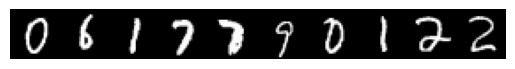

[0, 6, 1, 7, 7, 9, 0, 1, 2, 2]


In [3]:
print(x_train.shape,y_train.shape,x_test.shape)
indices = range(1000,2000,100)
plt.imshow(tf.concat([x_train[i] for i in indices], axis=1), cmap='gray')
plt.axis('off')
plt.show()
print([int(y_train[i]) for i in indices])
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
model_deep = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(112, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_deep.summary()
model_deep.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 112)            │        87,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 96)             │        10,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,626 (412.60 KB)

 Trainable params: 105,626 (412.60 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model_deep.fit(x_train,y_train,epochs=20,validation_split=0.1,batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8984 - loss: 0.3588 - val_accuracy: 0.9623 - val_loss: 0.1300
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9599 - loss: 0.1360 - val_accuracy: 0.9730 - val_loss: 0.0992
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0964 - val_accuracy: 0.9742 - val_loss: 0.0878
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0724 - val_accuracy: 0.9770 - val_loss: 0.0808
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0565 - val_accuracy: 0.9773 - val_loss: 0.0786
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0468 - val_accuracy: 0.9758 - val_loss: 0.0808
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0373 - val_accuracy: 0.9763 - val_loss: 0.0841
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.

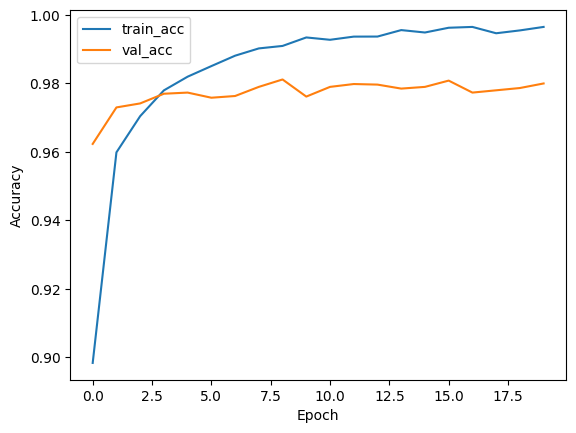

In [34]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=0)
print(test_acc)

0.9790999889373779


In [28]:
model_shallow =models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
model_shallow.summary()
model_shallow.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model_shallow.fit(x_train,y_train,epochs=20,validation_split=0.1,batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8976 - loss: 0.3760 - val_accuracy: 0.9530 - val_loss: 0.1754
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9490 - loss: 0.1765 - val_accuracy: 0.9655 - val_loss: 0.1241
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1275 - val_accuracy: 0.9690 - val_loss: 0.1077
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0986 - val_accuracy: 0.9727 - val_loss: 0.0929
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0812 - val_accuracy: 0.9740 - val_loss: 0.0892
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0664 - val_accuracy: 0.9730 - val_loss: 0.0907
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0557 - val_accuracy: 0.9775 - val_loss: 0.0787
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0467 - val_accuracy: 0.

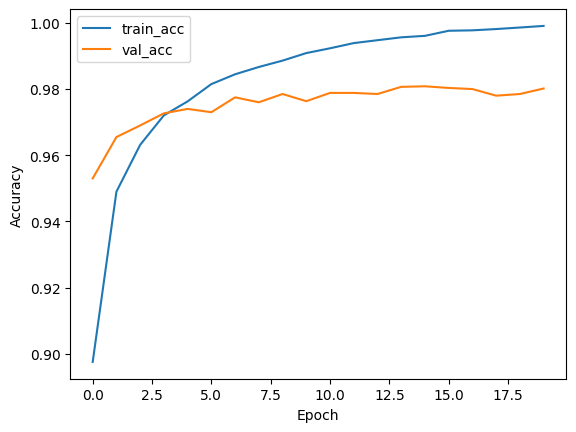

In [30]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
test_loss, test_acc = model_shallow.evaluate(x_test, y_test, verbose=0)
print(test_acc)

0.9764999747276306


In [24]:
x_train_cnn = x_train[..., None]
x_test_cnn  = x_test[..., None]

model_CNN = models.Sequential([
    layers.Conv2D(16,3,activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model_CNN.summary()
model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model_CNN.fit(x_train_cnn,y_train,epochs=20,validation_split=0.1,batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9207 - loss: 0.2815 - val_accuracy: 0.9712 - val_loss: 0.0949
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9768 - loss: 0.0774 - val_accuracy: 0.9818 - val_loss: 0.0623
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9836 - loss: 0.0538 - val_accuracy: 0.9860 - val_loss: 0.0465
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9879 - loss: 0.0412 - val_accuracy: 0.9875 - val_loss: 0.0468
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9894 - loss: 0.0335 - val_accuracy: 0.9902 - val_loss: 0.0423
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.9895 - val_loss: 0.0412
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9900 - val_loss: 0.0354
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accu

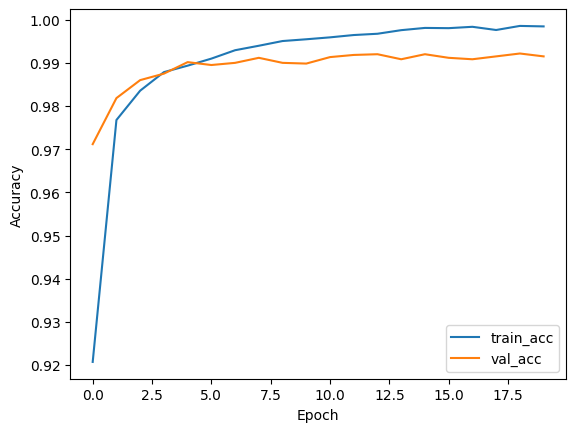

In [26]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model_CNN.evaluate(x_test_cnn, y_test, verbose=0)
print(test_acc)

0.9900000095367432


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7229 - loss: 0.8491 - val_accuracy: 0.8700 - val_loss: 0.4065
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9071 - loss: 0.2661 - val_accuracy: 0.9133 - val_loss: 0.2723
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9643 - loss: 0.1150 - val_accuracy: 0.9133 - val_loss: 0.3062
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9857 - loss: 0.0484 - val_accuracy: 0.9067 - val_loss: 0.3799
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9621 - loss: 0.1301 - val_accuracy: 0.8717 - val_loss: 0.4115
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9729 - loss: 0.0732 - val_accuracy: 0.8950 - val_loss: 0.4076
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9836 - loss: 0.0515 - val_accuracy: 0.9333 - val_loss: 0.2806
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9993 - loss: 0.0053 - val_accuracy: 0.9267 - v

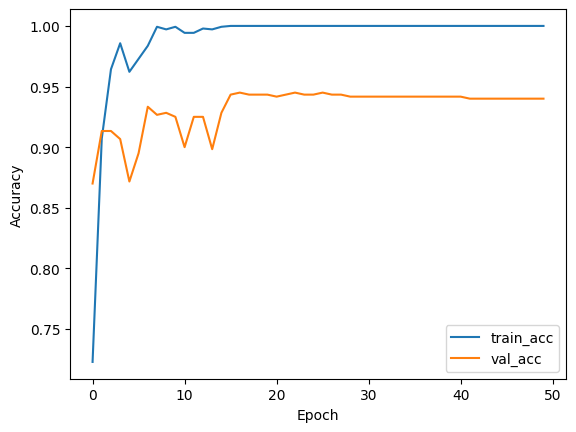

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train_small = x_train[:2000]
y_train_small = y_train[:2000]

overfit_model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

overfit_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = overfit_model.fit(
    x_train_small, y_train_small,
    epochs=50,
    validation_split=0.3,
    batch_size=32
)

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
upload = files.upload()
npzfile = np.load('CBCL.npz')
trainface = npzfile['arr_0']
trainnonface = npzfile['arr_1']
testface = npzfile['arr_2']
testnonface = npzfile['arr_3']
print(trainface.shape)
print(trainnonface.shape)
print(testface.shape)
print(testnonface.shape)

In [ ]:
def BPNNtrain(pf,nf,hn,lr,epoch):
  pn = pf.shape[0] #2429
  nn = nf.shape[0] #4548
  fn = pf.shape[1] #361
  feature = np.append(pf,nf,axis=0)
  target = np.append(np.ones((pn,1)),np.zeros((nn,1)),axis=0)
  WI = np.random.normal(0,1,(fn+1,hn))
  WO = np.random.normal(0,1,(hn+1,1))
  for t in range(epoch):
    s = random.sample(range(pn+nn),pn+nn)
    for i in range(pn+nn):
      ins = np.append(feature[s[i],:],1)
      ho = ins.dot(WI)
      ho = 1/(1+np.exp(-ho))
      hs = np.append(ho,1)
      out = hs.dot(WO)
      out = 1/(1+math.exp(-out))
      dk = out*(1-out)*(target[s[i]]-out)
      dh = ho*(1-ho)*WO[:hn,0]*dk
      WO[:,0] += lr*dk*hs
      for j in range(hn):
        WI[:,j] += lr*dh[j]*ins
  model = dict()
  model['WI'] = WI
  model['WO'] = WO
  return model

def BPNNtest(feature,model):
  sn = feature.shape[0]
  WI = model['WI']
  WO = model['WO']
  hn = WI.shape[1]
  out = np.zeros((sn,1))
  for i in range(sn):
    ins = np.append(feature[i,:],1)
    ho = ins.dot(WI)
    ho = 1/(1+np.exp(-ho))
    hs = np.append(ho,1)
    out[i] = hs.dot(WO)
    out[i] = 1/(1+math.exp(-out[i]))
  return out

network = BPNNtrain(trainface/255,trainnonface/255,40,0.01,20)

In [ ]:
pscore = BPNNtest(trainface/255,network)
nscore = BPNNtest(trainnonface/255,network)
x = np.zeros((1001,))
y = np.zeros((1001,))
for i in range(1001):
  threshold = i/1000
  y[i] = np.sum(pscore>=threshold)/pscore.shape[0]
  x[i] = np.sum(nscore>=threshold)/nscore.shape[0]
plt.plot(x,y)
plt.show()

In [ ]:
pscore = BPNNtest(testface/255,network)
nscore = BPNNtest(testnonface/255,network)
x = np.zeros((1001,))
y = np.zeros((1001,))
for i in range(1001):
  threshold = i/1000
  y[i] = np.sum(pscore>=threshold)/pscore.shape[0]
  x[i] = np.sum(nscore>=threshold)/nscore.shape[0]
plt.plot(x,y)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
S0 = 50
vol = 0.3
K = 52
T = 2
r = 0.05
NT = [12*T, 52*T, 252*T] #timestamp

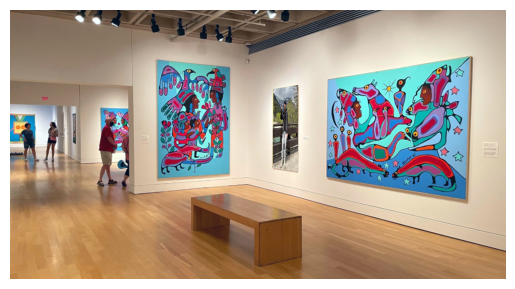

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

BG = Image.open('BG.png')
FG = Image.open('FG.png')

BG_data = np.asarray(BG).copy()
FG_data = np.asarray(FG).copy()
[HB,WB,t] = BG_data.shape
[HF,WF,t] = FG_data.shape
x1 = 490
y1 = 148
p1 = 0
q1 = 0
x2 = 535
y2 = 141
p2 = WF-1
q2 = 0
x3 = 488
y3 = 294
p3 = 0
q3 = HF-1
x4 = 536
y4 = 302
p4 = WF-1
q4 = HF-1
A = np.zeros((8,8))
b = np.zeros((8,1))
A[0,:] = [-x1,-y1,-1,0,0,0,x1*p1,y1*p1]
b[0,0] = -p1
A[1,:] = [0,0,0,-x1,-y1,-1,x1*q1,y1*q1]
b[1,0] = -q1

# 第二個點 (x2,y2) -> (p2,q2)
A[2,:] = [-x2, -y2, -1, 0, 0, 0, x2*p2, y2*p2]
b[2,0] = -p2
A[3,:] = [0, 0, 0, -x2, -y2, -1, x2*q2, y2*q2]
b[3,0] = -q2

# 第三個點 (x3,y3) -> (p3,q3)
A[4,:] = [-x3, -y3, -1, 0, 0, 0, x3*p3, y3*p3]
b[4,0] = -p3
A[5,:] = [0, 0, 0, -x3, -y3, -1, x3*q3, y3*q3]
b[5,0] = -q3

# 第四個點 (x4,y4) -> (p4,q4)
A[6,:] = [-x4, -y4, -1, 0, 0, 0, x4*p4, y4*p4]
b[6,0] = -p4
A[7,:] = [0, 0, 0, -x4, -y4, -1, x4*q4, y4*q4]
b[7,0] = -q4

x = np.linalg.lstsq(A, b, rcond=None)[0].flatten()  # flatten
H = np.zeros((3,3))
H[0,0] = x[0]; H[0,1] = x[1]; H[0,2] = x[2]
H[1,0] = x[3]; H[1,1] = x[4]; H[1,2] = x[5]
H[2,0] = x[6]; H[2,1] = x[7]; H[2,2] = 1

xy1 = np.ones((3,1))
for h in range(HB):
    for w in range(WB):
        xy1[0,0] = w
        xy1[1,0] = h
        pq1 = np.dot(H, xy1)
        if pq1[2,0] == 0:
            continue
        p = int(pq1[0,0] / pq1[2,0])
        q = int(pq1[1,0] / pq1[2,0])
        if 0 <= p < WF and 0 <= q < HF:
            BG_data[h,w,:] = FG_data[q,p,:]

I = Image.fromarray(BG_data)
plt.imshow(I)
plt.axis('off')
plt.show()

[*********************100%***********************]  1 of 1 completed


Generation 1, Best SAD: 667.3551
Generation 2, Best SAD: 663.2916
Generation 3, Best SAD: 658.3248
Generation 4, Best SAD: 657.4367
Generation 5, Best SAD: 656.6057
Generation 6, Best SAD: 655.4225
Generation 7, Best SAD: 655.4225
Generation 8, Best SAD: 655.4225
Generation 9, Best SAD: 655.3532
Generation 10, Best SAD: 655.3532
Generation 11, Best SAD: 655.3532
Generation 12, Best SAD: 655.2313
Generation 13, Best SAD: 655.1076
Generation 14, Best SAD: 655.1076
Generation 15, Best SAD: 655.1076
Generation 16, Best SAD: 655.1076
Generation 17, Best SAD: 655.1076
Generation 18, Best SAD: 654.8138
Generation 19, Best SAD: 654.7535
Generation 20, Best SAD: 654.7535
Generation 21, Best SAD: 654.7535
Generation 22, Best SAD: 654.6631
Generation 23, Best SAD: 654.6631
Generation 24, Best SAD: 654.6631
Generation 25, Best SAD: 654.6631
Generation 26, Best SAD: 654.6390
Generation 27, Best SAD: 654.6390
Generation 28, Best SAD: 654.6390
Generation 29, Best SAD: 654.6390
Generation 30, Best SAD

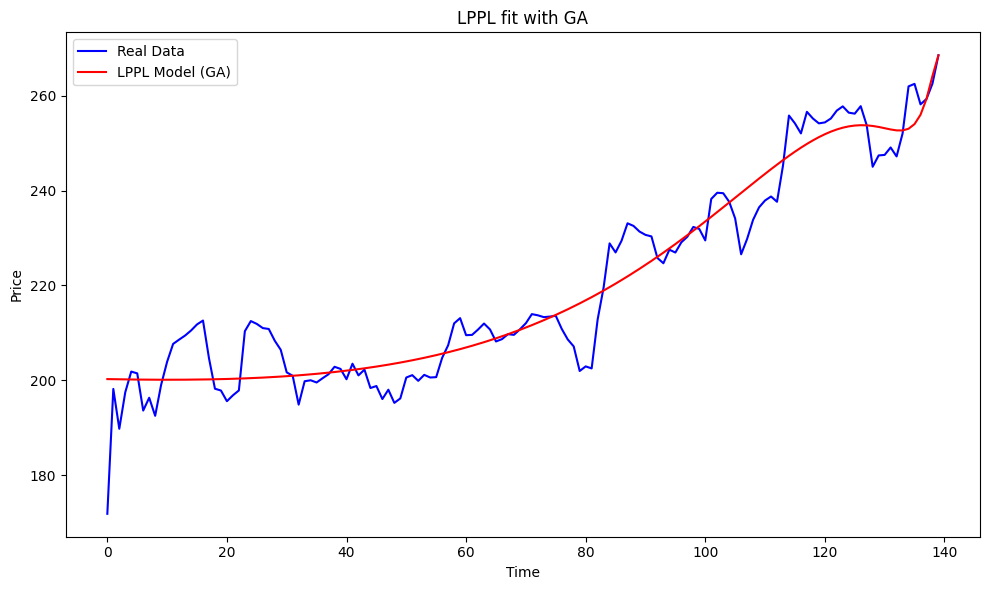

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 1. 下載 AAPL 資料
ticker = "AAPL"
start_date = "2025-04-08"
end_date   = "2025-10-28"

data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

# 取收盤價當作真實資料 p_real
AAPL = data['Close'].to_numpy()
p_real = AAPL.copy().astype(float)
p_real = p_real.squeeze()              # (N,)
t = np.arange(len(p_real))             # 時間索引 0,1,...,N-1
tc = t[-1] + 1                         # 假設泡沫發生在最後一天之後一點點（避免 tc - t = 0）


# 2. 基因編碼：bits → (beta, omega, phi)
bits_per_param = 20                    # 每個參數用 20 bits
gene_len = bits_per_param * 3          # 三個參數：beta, omega, phi

def gene2param(gene):
    """
    gene: shape (gene_len,), 元素為 0/1
    回傳：beta, omega, phi
    """
    # 先把三段 bits 拆出來，轉成非負整數
    idx = np.arange(bits_per_param)

    # beta
    bits_beta = gene[0 : bits_per_param]
    int_beta  = np.sum((2 ** idx) * bits_beta)
    # beta 範圍：0 ~ 2（你原本註解的範圍）
    beta = 0.0 + int_beta / (2**bits_per_param - 1) * 2.0

    # omega
    bits_omega = gene[bits_per_param : 2*bits_per_param]
    int_omega  = np.sum((2 ** idx) * bits_omega)
    # omega 範圍：0 ~ 600（你原本寫的註解）
    omega = 0.0 + int_omega / (2**bits_per_param - 1) * 600.0

    # phi
    bits_phi = gene[2*bits_per_param : 3*bits_per_param]
    int_phi  = np.sum((2 ** idx) * bits_phi)
    # phi 範圍：0 ~ 2π
    phi = 0.0 + int_phi / (2**bits_per_param - 1) * 2.0 * np.pi

    return beta, omega, phi


# 3. 給定 (beta, omega, phi) → 線性回歸求 A, B, C
def lppl_linear_params(t, tc, beta, omega, phi, p_real):
    """
    利用 two-step algorithm：
    已知非線性參數 (beta, omega, phi)，對 A, B, C 做線性回歸
    p_real: 真實股價 (N,)
    """
    dt = tc - t
    dt = np.maximum(dt, 1e-6)                # 避免 log(0)

    f1 = dt ** beta
    f2 = dt ** beta * np.cos(omega * np.log(dt) + phi)

    # X: N x 3, 三個線性基底 [1, f1, f2]
    X = np.column_stack([np.ones_like(t), f1, f2])

    # 最小平方法解出 A, B, C
    coeffs, _, _, _ = np.linalg.lstsq(X, p_real, rcond=None)
    A, B, C = coeffs

    # 模型產生的價格
    p_model = A + B * f1 + C * f2
    return p_model, A, B, C


# 4. 誤差函數：SAD
def SAD(p_model, p_real):
    return np.sum(np.abs(p_model - p_real))

# （如果要看 MSE 也可以用這個）
def MSE(p_model, p_real):
    return np.mean((p_model - p_real) ** 2)


# 5. GA 參數設定
p = 20000              # 族群數（你現在用 2 萬）
r = 0.05               # 精英比例 5%
generation = 40        # 迭代代數
survive = round(p * r)
mutation_rate = 0.08   # 每個 bit 突變機率 8%

# 初始族群與 fitness
pop = np.random.randint(0, 2, (p, gene_len))  # (p, gene_len)
fit = np.zeros((p, 1))


# 6. 初次計算每個個體的 SAD
for i in range(p):
    gene = pop[i, :]
    beta, omega, phi = gene2param(gene)
    p_model, A, B, C = lppl_linear_params(t, tc, beta, omega, phi, p_real)
    fit[i] = SAD(p_model, p_real)


# 7. GA 主迴圈
for gener in range(generation):
    # 依照 fitness 排序（SAD 越小越好）
    sort_idx = np.argsort(fit[:, 0])
    pop = pop[sort_idx, :]
    fit = fit[sort_idx, :]

    print(f"Generation {gener+1}, Best SAD: {fit[0,0]:.4f}")

    # 交配產生後代（保留前 survive 個精英）
    for i in range(survive, p):
        # 隨機挑父母（都從精英裡挑）
        fid = np.random.randint(0, survive)
        mid = np.random.randint(0, survive)
        while mid == fid:
            mid = np.random.randint(0, survive)

        father = pop[fid, :].copy()
        mother = pop[mid, :].copy()

        # random mask 決定每個 bit 由誰提供
        mask = np.random.rand(gene_len) < 0.5
        child = mother
        child[mask] = father[mask]
        pop[i, :] = child

    # 突變（只對非精英）
    for i in range(survive, p):
        mutate_mask = np.random.rand(gene_len) < mutation_rate
        pop[i, mutate_mask] = 1 - pop[i, mutate_mask]  # bit flip

    # 產生新一代後，重新計算 fitness
    for i in range(p):
        gene = pop[i, :]
        beta, omega, phi = gene2param(gene)
        p_model, A, B, C = lppl_linear_params(t, tc, beta, omega, phi, p_real)
        fit[i] = SAD(p_model, p_real)


# 8. 取最好的解，輸出參數與畫圖
best_gene = pop[np.argmin(fit[:, 0]), :]
beta_opt, omega_opt, phi_opt = gene2param(best_gene)
p_model_opt, A_opt, B_opt, C_opt = lppl_linear_params(
    t, tc, beta_opt, omega_opt, phi_opt, p_real
)

print("\nOptimal parameters:")
print(f"A={A_opt:.4f}, B={B_opt:.4f}, C={C_opt:.4f}")
print(f"beta={beta_opt:.4f}, omega={omega_opt:.4f}, phi={phi_opt:.4f}")
print(f"tc={tc:.4f}")
print(f"SAD={SAD(p_model_opt, p_real):.4f}")
print(f"MSE={MSE(p_model_opt, p_real):.4f}")

# 畫圖
plt.figure(figsize=(10, 6))
plt.plot(t, p_real, label='Real Data', color='blue')
plt.plot(t, p_model_opt, label='LPPL Model (GA)', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('LPPL fit with GA')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def F2(t,A,B,C,D):
  return A*(t**B)+C*np.cos(D*t)+np.random.normal(0,1,t.shape)

n = 1000
T = np.random.random((n,1))*100
b2 = F2(T,0.6,1.2,100,0.4)

def Energy(b2,T,A,B,C,D):
  return np.sum(abs(b2-F2(T,A,B,C,D)))

y = np.zeros((1024,1))
for x in range(1024):
  d = -5.11+x/100
  y[x]=Energy(b2,T,0.6,1.2,100,d)

plt.plot(y)
plt.show()

In [ ]:
def gene2ABCD(gene):
  A = -5.11 + np.sum(2**np.arange(10)*gene[0:10])/100
  B = -5.11 + np.sum(2**np.arange(10)*gene[10:20])/100
  C = -511 + np.sum(2**np.arange(10)*gene[20:30])
  D = -5.11 + np.sum(2**np.arange(10)*gene[30:40])/100
  return A,B,C,D

p=10000
r=0.01
m=1000
generation=10
survive=round(p*r)

pop = np.random.randint(0,2,(p,40))
fit = np.zeros((p,1))
for gener in range(generation):
  for i in range(p):
    gene = pop[i,:]
    A,B,C,D = gene2ABCD(gene)
    fit[i] = Energy(b2,T,A,B,C,D)
  sortf = np.argsort(fit[:,0])
  pop = pop[sortf,:]
  for i in range(survive,p):
    fid = np.random.randint(0,survive)
    mid = np.random.randint(0,survive)
    while mid==fid:
      mid = np.random.randint(0,survive)
    mask = np.random.randint(0,2,(1,40))
    son = pop[mid,:].copy()
    father = pop[fid,:]
    son[mask[0,:]==1]=father[mask[0,:]==1]
    pop[i,:]=son
  for i in range(m):
    mr = np.random.randint(survive,p)
    mc = np.random.randint(0,40)
    pop[mr,mc] = 1-pop[mr,mc]

In [ ]:
for i in range(p):
  gene = pop[i,:]
  A,B,C,D = gene2ABCD(gene)
  fit[i] = Energy(b2,T,A,B,C,D)
sortf = np.argsort(fit[:,0])
pop = pop[sortf,:]

gene = pop[0,:]
A,B,C,D = gene2ABCD(gene)
print(A,B,C,D,Energy(b2,T,A,B,C,D))

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2025-04-08"
end_date = "2025-10-28"

data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
AAPL = data[['Close']].to_numpy()
plt.plot(AAPL)

In [ ]:
AAPL.shape

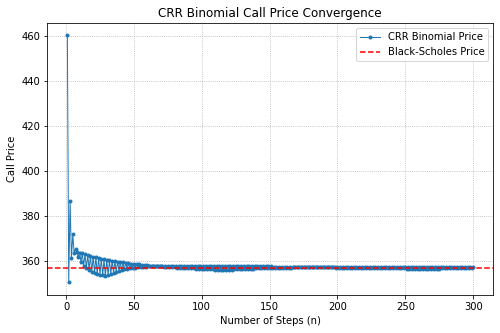

In [14]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def BLScall(S,K,T,r,vol):
  d1 = (math.log(S/K)+(r+vol*vol/2)*T)/(vol*math.sqrt(T))
  d2 = d1-vol*math.sqrt(T)
  call = S*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)
  return call

def bitcall(S0,K,T,r,vol,n):
  dt = T/n
  u = math.exp(vol*math.sqrt(dt))
  d = math.exp(-vol*math.sqrt(dt))
  p = (math.exp(r*dt)-d)/(u-d)
  priceT = np.zeros((n+1,n+1))
  probT = np.zeros((n+1,n+1))
  priceT[0][0] = S0
  for C in range(n):
    priceT[0][C+1] = priceT[0][C]*u
    for R in range(C+1):
      priceT[R+1][C+1] = priceT[R][C]*d
  probT[0][0] = 1
  for C in range(n):
    for R in range(C+1):
      probT[R][C+1] += probT[R][C]*p
      probT[R+1][C+1] += probT[R][C]*(1-p)
  call = 0
  for R in range(n+1):
    if priceT[R][n]>=K:
      call += (priceT[R][n]-K)*probT[R][n]
  return call*math.exp(-r*T)

S = 26196.73
K = 26400
T = 21/365
r = 0.01785
vol = 0.17473994
n = 100
# print(BLScall(S,K,T,r,vol))
# print(bitcall(S,K,T,r,vol,n))
# print((BLScall(S+0.001,K,T,r,vol)-BLScall(S-0.001,K,T,r,vol))/0.002)

bs_price = BLScall(S, K, T, r, vol)

# Compute binomial prices for different step numbers
ns = range(1, 301)   # steps from 1 to 300
binom_prices = [bitcall(S, K, T, r, vol, n) for n in ns]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ns, binom_prices, marker='o', markersize=3, linewidth=1, label="CRR Binomial Price")
plt.axhline(bs_price, linestyle='--', color='red', label="Black-Scholes Price")
plt.title('CRR Binomial Call Price Convergence')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

In [4]:
import math
from scipy.stats import norm

# Black-Scholes call price
def BLScall(S, K, T, r, sigma):
    d1 = (math.log(S/K) + (r + 0.5*sigma*sigma)*T) / (sigma*math.sqrt(T))
    d2 = d1 - sigma*math.sqrt(T)
    return S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)

# Greeks by finite difference
def greeks_fd(S, K, T, r, sigma, dS=1e-3, dSigma=1e-4, dT=1e-5, dr=1e-5):
    C0 = BLScall(S, K, T, r, sigma)
    
    # Delta
    delta = (BLScall(S + dS, K, T, r, sigma) - BLScall(S - dS, K, T, r, sigma)) / (2 * dS)
    
    # Gamma
    gamma = (BLScall(S + dS, K, T, r, sigma) - 2*C0 + BLScall(S - dS, K, T, r, sigma)) / (dS**2)
    
    # Vega
    vega = (BLScall(S, K, T, r, sigma + dSigma) - BLScall(S, K, T, r, sigma - dSigma)) / (2 * dSigma)
    
    # Theta (注意 T 減少代表時間流逝，所以要取負號)
    theta = -(BLScall(S, K, T + dT, r, sigma) - BLScall(S, K, T - dT, r, sigma)) / (2 * dT)
    
    # Rho
    rho = (BLScall(S, K, T, r + dr, sigma) - BLScall(S, K, T, r - dr, sigma)) / (2 * dr)
    
    return {
        "Delta": delta,
        "Gamma": gamma,
        "Vega": vega,
        "Theta": theta,
        "Rho": rho
    }

# 測試參數
S = 26196.73
K = 26400
T = 21/365
r = 0.01785
sigma = 0.17473994

greeks = greeks_fd(S, K, T, r, sigma)
for k,v in greeks.items():
    print(f"{k}: {v}")


Delta: 0.44474338938016444
Gamma: 0.0003601599019020796
Vega: 2482.7195214948006
Theta: -3971.7863075566124
Rho: 649.7815676084429


In [1]:
import math
from sklearn import datasets
import numpy as np

def entropy(p1,n1):
  if p1==0 and n1==0:
    return 1
  elif p1==0 or n1==0:
    return 0
  else:
    return -(p1/(p1+n1))*math.log2(p1/(p1+n1))-(n1/(p1+n1))*math.log2(n1/(p1+n1))
  
def IG(p1,n1,p2,n2):
  num = p1+n1+p2+n2
  num1 = p1+n1
  num2 = p2+n2
  return entropy(p1+p2,n1+n2)-(num1/num*entropy(p1,n1)+num2/num*entropy(p2,n2))

print(IG(21,5,8,30))
print(IG(18,33,11,2))


0.26587486854294173
0.12143188346323397


In [1]:
from sklearn import datasets
data = datasets.load_iris()
print(set(data.target[50:100]))  

{1}


In [2]:
import math
import numpy as np
from sklearn import datasets

# ===== Entropy & IG =====
def entropy(p1, n1):
    if p1 == 0 or n1 == 0:
        return 0
    return -(p1/(p1+n1))*math.log2(p1/(p1+n1)) - (n1/(p1+n1))*math.log2(n1/(p1+n1))

def IG(p1, n1, p2, n2):
    num = p1+n1+p2+n2
    num1 = p1+n1
    num2 = p2+n2
    return entropy(p1+p2, n1+n2) - (num1/num)*entropy(p1, n1) - (num2/num)*entropy(p2, n2)

# ===== ID3 =====
def ID3DTtrain(feature, target):
    node = dict()
    node['data'] = range(len(target))
    tree = [node]
    t = 0
    while t < len(tree):
        idx = list(tree[t]['data'])
        if np.sum(target[idx]) == 0:
            tree[t]['leaf'] = 1
            tree[t]['decision'] = 0
        elif np.sum(target[idx]) == len(idx):
            tree[t]['leaf'] = 1
            tree[t]['decision'] = 1
        else:
            bestIG = 0
            for i in range(feature.shape[1]):
                pool = np.unique(feature[idx, i])
                for j in range(len(pool)-1):
                    thres = (pool[j] + pool[j+1]) / 2
                    G1 = [k for k in idx if feature[k, i] < thres]
                    G2 = [k for k in idx if feature[k, i] >= thres]
                    if len(G1) == 0 or len(G2) == 0:
                        continue
                    p1 = np.sum(target[G1] == 1)
                    n1 = np.sum(target[G1] == 0)
                    p2 = np.sum(target[G2] == 1)
                    n2 = np.sum(target[G2] == 0)
                    thisIG = IG(p1, n1, p2, n2)
                    if thisIG > bestIG:
                        bestIG = thisIG
                        bestf, bestthres = i, thres
                        bestG1, bestG2 = G1, G2
            if bestIG > 1e-6:
                tree[t]['leaf'] = 0
                tree[t]['selectf'] = bestf
                tree[t]['threshold'] = bestthres
                tree[t]['child'] = [len(tree), len(tree)+1]
                tree.append({'data': bestG1})
                tree.append({'data': bestG2})
            else:
                tree[t]['leaf'] = 1
                tree[t]['decision'] = 1 if np.sum(target[idx]) > len(idx)/2 else 0
        t += 1
    return tree

def ID3DTpredict(tree, feature):
    pred = np.zeros(len(feature))
    for i, x in enumerate(feature):
        t = 0
        while tree[t]['leaf'] == 0:
            f = tree[t]['selectf']
            th = tree[t]['threshold']
            if x[f] < th:
                t = tree[t]['child'][0]
            else:
                t = tree[t]['child'][1]
        pred[i] = tree[t]['decision']
    return pred

# ===== Metrics =====
def metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TPR = TP / (TP + FN) if (TP + FN) else 0
    FPR = FP / (FP + TN) if (FP + TN) else 0
    ACC = (TP + TN) / (TP + TN + FP + FN)
    PPV = TP / (TP + FP) if (TP + FP) else 0
    NPV = TN / (TN + FN) if (TN + FN) else 0
    F1 = 2 * TP / (2 * TP + FP + FN) if (2 * TP + FP + FN) else 0
    print("\n===== TEST METRICS =====")
    print(f"TPR (Sensitivity): {TPR:.3f}")
    print(f"FPR: {FPR:.3f}")
    print(f"ACC: {ACC:.3f}")
    print(f"PPV (Precision): {PPV:.3f}")
    print(f"NPV: {NPV:.3f}")
    print(f"F1-score: {F1:.3f}")

# ===== Main =====
data = datasets.load_iris()
# G1=Versicolor(50-99), G2=Virginica(100-149)
feature = np.concatenate((data.data[50:100], data.data[100:150]), axis=0)
target = np.concatenate((data.target[50:100], data.target[100:150])) - 1
feature, target = np.array(feature), np.array(target)

# 每類前30筆train, 後20筆test
X_train = np.concatenate((feature[:30], feature[50:80]), axis=0)
y_train = np.concatenate((target[:30], target[50:80]), axis=0)
X_test = np.concatenate((feature[30:50], feature[80:]), axis=0)
y_test = np.concatenate((target[30:50], target[80:]), axis=0)

tree = ID3DTtrain(X_train, y_train)
y_pred = ID3DTpredict(tree, X_test)
metrics(y_test, y_pred)



===== TEST METRICS =====
TPR (Sensitivity): 1.000
FPR: 0.100
ACC: 0.950
PPV (Precision): 0.909
NPV: 1.000
F1-score: 0.952


In [2]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def BLScall(S,K,T,r,vol):
  d1 = (math.log(S/K)+(r+vol*vol/2)*T)/(vol*math.sqrt(T))
  d2 = d1-vol*math.sqrt(T)
  call = S*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)
  return call

S = 26196.73
K = 26400
T = 21/365
r = 0.01785
vol = 0.17473994
print(BLScall(S,K,T,r,vol))

357.0000033924698


In [3]:
def BisectionBLS(S,K,T,r,call):
  left = 0.0000001
  right = 1
  while(right-left>0.0000000001):
    mid = (left+right)/2
    if (BLScall(S,K,T,r,left)-call)*(BLScall(S,K,T,r,mid)-call) < 0:
      right = mid
    else:
      left = mid
  return (left+right)/2

print(BisectionBLS(S,K,T,r,357))

0.17473993865343107


In [4]:
def MCsim(S,T,r,vol,N,M):
  dt = T/N
  St = np.zeros((M,N+1))
  St[:,0] = S
  for i in range(N):
    St[:,i+1] = np.multiply(St[:,i],np.exp((r-0.5*vol*vol)*dt+vol*np.random.normal(0,1,(M,))*math.sqrt(dt)))
  return St

In [5]:
def MCsim_vectorized(S, T, r, vol, N, M):
    dt = T / N
    # 產生 M x N 的隨機數
    Z = np.random.normal(0, 1, (M, N))
    incre = np.exp((r - 0.5*vol**2)*dt + vol*np.sqrt(dt)*Z)
    St = np.multiply.accumulate(incre, axis=1)
    St = np.concatenate([np.full((M, 1), S), S*St], axis=1)
    return St


360.29371995575525


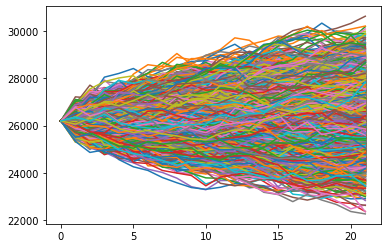

In [6]:
vol = BisectionBLS(S,K,T,r,357)
St = MCsim_vectorized(S,T,r,vol,21,10000)
call = np.mean(np.maximum(St[:,-1]-K,0))*math.exp(-r*T)
print(call)
plt.plot(St.transpose())
plt.show()

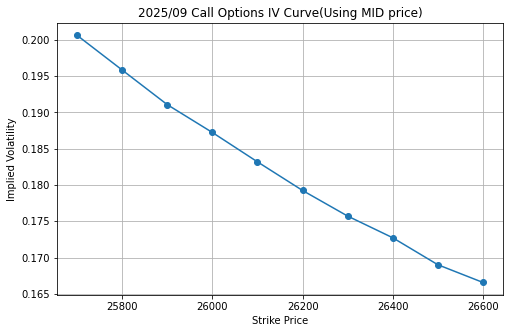

In [7]:
S = 26196.73       
r = 0.01785          
T = 21 / 365       

data = [
    (25700, 802.5),
    (25800, 727.5),
    (25900, 655.0),
    (26000, 587.5),
    (26100, 522.5),
    (26200, 461.0),
    (26300, 404.0),
    (26400, 352.0),
    (26500, 302.0),
    (26600, 259.0),
]

# data = [
#     (25700, 243.5),
#     (25800, 269.0),
#     (25900, 297.0),
#     (26000, 328.0),
#     (26100, 363.0),
#     (26200, 402.0),
#     (26300, 445.0),
#     (26400, 492.5),
#     (26500, 542.5),
#     (26600, 600.0),
# ]

strikes = [K for K, _ in data]
market_prices = [p for _, p in data]
ivs = [BisectionBLS(S, K, T, r, p) for K, p in data]

# === 繪圖 ===
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,5))
plt.plot(strikes, np.array(ivs), marker='o')
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("2025/09 Call Options IV Curve(Using MID price)")
plt.grid(True)
plt.show()


In [8]:
import matplotlib.pyplot as plt
import numpy as np
CALLprice = {24800:980,24900:905,25000:810,25100:735,25200:670,25300:605,25400:545,25500:486,25600:428,25700:380,25800:327,25900:283,26000:247,26100:213}
PUTprice = {24800:280,24900:310,25000:333,25100:365,25200:411,25300:432,25400:456,25500:510,25600:550,25700:625,25800:685,25900:745,26000:790,26100:850}
ST = np.arange(24000,27000)
def OptionProfit(pos):
  callpos = pos[0]
  putpos = pos[1]
  profit = np.zeros(ST.shape)
  for position in callpos:
    K = position[0]
    N = position[1]
    C = CALLprice[K]
    profit = profit + (np.maximum(ST-K,0)-C)*N
  for position in putpos:
    K = position[0]
    N = position[1]
    P = PUTprice[K]
    profit = profit + (np.maximum(K-ST,0)-P)*N
  return profit


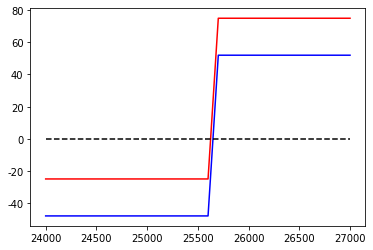

In [9]:
pos1 = [[[25600,1],[25700,-1]],[]]
pos2 = [[],[[25600,1],[25700,-1]]]

p1 = OptionProfit(pos1)
p2 = OptionProfit(pos2)
plt.plot(ST,p1,'b-')
plt.plot(ST,p2,'r-')
plt.plot([ST[0],ST[-1]],[0,0],'k--')

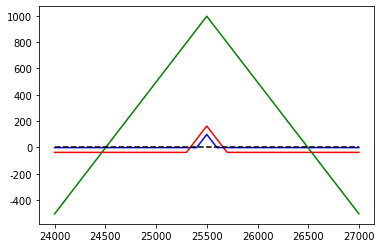

In [10]:
pos1 = [[[25400,1],[25500,-2],[25600,1]],[]]
pos2 = [[],[[25300,1],[25500,-2],[25700,1]]]
pos3 = [[[25500,-1]],[[25500,-1]]]

p1 = OptionProfit(pos1)
p2 = OptionProfit(pos2)
p3 = OptionProfit(pos3)
plt.plot(ST,p1,'b-')
plt.plot(ST,p2,'r-')
plt.plot(ST,p3,'g-')
plt.plot([ST[0],ST[-1]],[0,0],'k--')

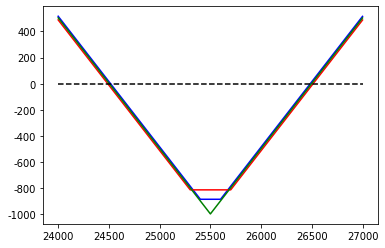

In [11]:
pos1 = [[[25600,1]],[[25400,1]]]
pos2 = [[[25700,1]],[[25300,1]]]
pos3 = [[[25500,1]],[[25500,1]]]

p1 = OptionProfit(pos1)
p2 = OptionProfit(pos2)
p3 = OptionProfit(pos3)
plt.plot(ST,p1,'b-')
plt.plot(ST,p2,'r-')
plt.plot(ST,p3,'g-')
plt.plot([ST[0],ST[-1]],[0,0],'k--')

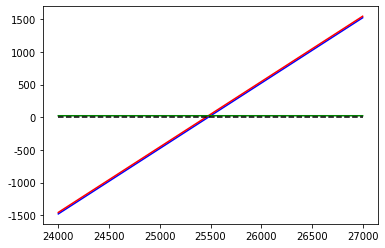

In [12]:
pos1 = [[[25600,1]], [[25600,-1]]]
pos2 = [[[25700,1]], [[25700,-1]]] 

p1 = OptionProfit(pos1)
p2 = OptionProfit(pos2)

plt.plot(ST, p1, 'b-')
plt.plot(ST, p2, 'r-')
plt.plot(ST, p2-p1, 'g-')
plt.plot([ST[0],ST[-1]], [0,0], 'k--')